In this question, you'll explore feature engineering and interpretability using a toy dataset.

Let's start by loading the data, which has already been split for you into train and test sets:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

In [5]:
# This is the same function from lecture

def draw_results(x1, x2, color, plot_title=''):
    plt.figure()
    plt.scatter(x1, x2, c=color, cmap='viridis', alpha=0.7);
    plt.colorbar()
    plt.title(plot_title)
    plt.axis('equal')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.tight_layout()

0.64
0.64


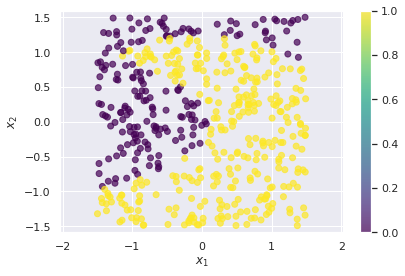

In [6]:
# Delete these cells from the final version: 
# they're just to help you generate the data

N_test = 500
# Create a test dataset
x1_test = np.random.uniform(-1.5, 1.5, N_test)
x2_test = np.random.uniform(-1.5, 1.5, N_test)

def make_y(x1, x2):
    r = np.sqrt(x1**2 + x2**2)
    #out = ((r > 0.7) & (r < 1.25)).astype(np.int32)
    out = (((r + x1) > 0.3) & ((r+x2) < 2.5)).astype(np.int32)
    print(np.mean(out))
    return out

draw_results(x1_test, x2_test, make_y(x1_test, x2_test))

pd.DataFrame(
    {'y': make_y(x1_test, x2_test), 'x1': x1_test, 'x2': x2_test}
).to_csv('ring_train.csv', index=False)

0.6226666666666667
0.6226666666666667


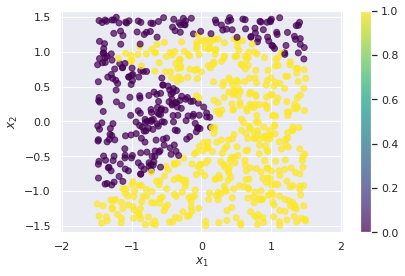

In [7]:
N_test = 750
# Create a test dataset
x1_test = np.random.uniform(-1.5, 1.5, N_test)
x2_test = np.random.uniform(-1.5, 1.5, N_test)

def make_y(x1, x2):
    r = np.sqrt(x1**2 + x2**2)
    out = (((r + x1) > 0.3) & ((r+x2) < 2.5)).astype(np.int32)
    print(np.mean(out))
    return out

draw_results(x1_test, x2_test, make_y(x1_test, x2_test))

pd.DataFrame(
    {'y': make_y(x1_test, x2_test), 'x1': x1_test, 'x2': x2_test}
).to_csv('ring_test.csv', index=False)

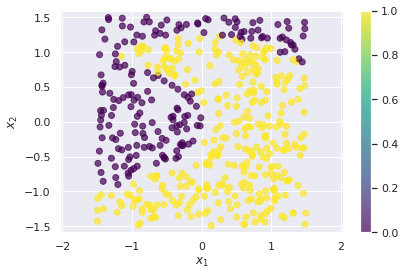

In [115]:
import pandas as pd
ring_train = pd.read_csv('ring_train.csv')
ring_test = pd.read_csv('ring_test.csv')
draw_results(ring_train['x1'], ring_train['x2'], color=ring_train['y'])

We know from lecture that logistic regression will use a line as a decision boundary. 

(Optional) Where would you draw the best line to classify these points?

The following code 

In [47]:
# No need to write any code here: just understand.
X_train = ring_train[['x1', 'x2']].values
y_train = ring_train['y'].values

X_test = ring_test[['x1', 'x2']].values
y_test = ring_test['y'].values

Accuracy on training set: 0.784


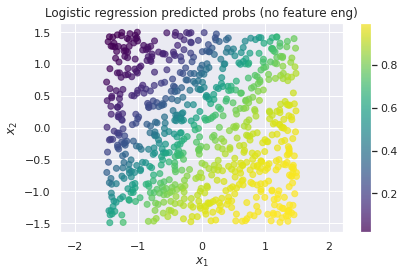

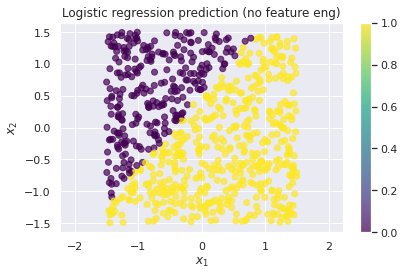

In [116]:
# No need to write any code here: just understand.
X_train = ring_train[['x1', 'x2']].values
y_train = ring_train['y'].values

X_test = ring_test[['x1', 'x2']].values
y_test = ring_test['y'].values

model_simple_features = LogisticRegression(
    penalty='none', solver='lbfgs'
)

model_simple_features.fit(X_test, y_test)

probs = model_simple_features.predict_proba(X_test)[:, 1]
y_hat = (probs > 0.5).astype(np.int64)

draw_results(
    X_test[:, 0], X_test[:, 1], color=probs, 
    plot_title="Logistic regression predicted probs (no feature eng)"
)
draw_results(
    X_test[:, 0], X_test[:, 1], color=y_hat, 
    plot_title="Logistic regression prediction (no feature eng)"
)

accuracy = np.mean(y_test == y_hat)
print(f"Accuracy on training set: {accuracy}")

With the checkerboard dataset, we engineered a new feature, $x_1 \times x_2$, which was just what we needed. For this dataset, the feature that we need is a little more complicated.

Instead, we'll take inspiration from neural networks, and add many random features, where each is a random linear combination of the inputs, where the coefficients will be random numbers between -1 and 1.

Don't forget that we also need to apply a nonlinearity, or else the linear combinations won't help us when applying logistic regression. In this example, we'll use the sigmoid function. For example, one feature might be $\sigma(-0.37x_1 + 0.82x_2)$.

In [170]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def add_random_feature(train_data, test_data):
    coeffs = ... # TODO: fill in
    coeffs = np.random.uniform(-1, 1, 2)
    # This code gives the feature a convenient name
    feat_name = f"σ({coeffs[0]:0.2f}x1 + {coeffs[1]:0.2f}x2)"

    for dataset in (train_data, test_data):
        linear_combination = np.dot(dataset[['x1', 'x2']], coeffs)
    
        feature = ... # TODO: fill in
        feature = sigmoid(linear_combination)
        dataset[feat_name] = feature
    return train_data, test_data

In [172]:
# This cell uses the code you wrote to add 10 random features to the
# train and test sets.

ring_train_feats = ring_train.copy()
ring_test_feats = ring_test.copy()
for i in range(10):
    ring_train_feats, ring_test_feats = (
        add_random_feature(ring_train_feats, ring_test_feats)
    )
ring_train_feats.head()

,y,x1,x2,ReLU(0.95x1 + -0.05x2),ReLU(0.23x1 + 0.85x2),ReLU(-0.44x1 + -0.94x2),ReLU(0.70x1 + -0.24x2),ReLU(-0.58x1 + -0.40x2),ReLU(-0.73x1 + 0.65x2),ReLU(-0.91x1 + 0.51x2),ReLU(-0.05x1 + 0.41x2),ReLU(0.91x1 + -0.05x2),ReLU(-0.47x1 + -0.45x2)
0,1,0.488843,1.174045,0.600809,0.751458,0.210295,0.514800,0.319630,0.600923,0.538258,0.612005,0.595050,0.319507
1,0,-0.662617,1.306560,0.334670,0.722442,0.281580,0.315114,0.465113,0.791536,0.779726,0.639032,0.338851,0.431473
2,1,1.081664,0.536142,0.730907,0.668335,0.271812,0.651631,0.300760,0.392169,0.330070,0.540563,0.722322,0.321348
3,0,-1.058596,-0.738758,0.275260,0.295847,0.762437,0.363212,0.713337,0.571833,0.642000,0.438572,0.283984,0.695870
4,1,1.083220,0.877516,0.728107,0.729161,0.212864,0.633046,0.272559,0.446008,0.369144,0.575073,0.719128,0.288737


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on training set: 0.9346666666666666


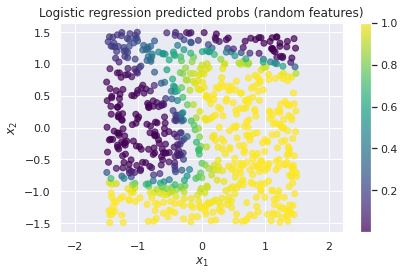

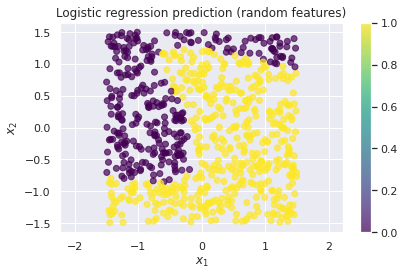

In [168]:
# No need to write any code here: just understand.
X_train = ring_train_feats.iloc[:, 1:].values
y_train = ring_train_feats['y'].values

X_test = ring_test_feats.iloc[:, 1:].values
y_test = ring_test_feats['y'].values

model_features = LogisticRegression(
    penalty='none', solver='lbfgs'
)

model_features.fit(X_train, y_train)

probs = model_features.predict_proba(X_test)[:, 1]
y_hat = (probs > 0.5).astype(np.int64)

draw_results(
    X_test[:, 0], X_test[:, 1], color=probs, 
    plot_title="Logistic regression predicted probs (random features)"
)

draw_results(
    X_test[:, 0], X_test[:, 1], color=y_hat, 
    plot_title="Logistic regression prediction (random features)"
)

accuracy = np.mean(y_test == y_hat)
print(f"Accuracy on training set: {accuracy}")

You should see that the accuracy is already better. Now that our model has improved, let's try to interpret it.

Fill in the blanks in the following code that creates a dataframe with the coefficients from the logistic regression model.

*Hint: you may find it helpful to refer to the demo from lecture.*

In [154]:
model_features.coef_

array([[  7.50940256, -18.19929137,   4.15012508,  12.71434346,
        -30.60266968,  14.96303784,  28.34137403,  -1.73069513,
         15.46626277, -11.61714121,  -5.65716375,  -6.62874312]])

In [157]:
feature_names = ring_train_feats.columns[1:]
logistic_coeff_vals = ... # TODO fill in
logistic_coeff_vals = model_features.coef_[0, :]
len(logistic_coeff_vals)
coefficient_df = pd.DataFrame(
    {'feature': feature_names, 'coefficients': logistic_coeff_vals}
)

coefficient_df

,feature,coefficients
0,x1,7.509403
1,x2,-18.199291
2,ReLU(0.45x1 + -0.85x2),4.150125
3,ReLU(-0.65x1 + 0.32x2),12.714343
4,ReLU(-0.62x1 + -0.89x2),-30.602670
5,ReLU(-0.34x1 + 0.29x2),14.963038
6,ReLU(-0.36x1 + -0.82x2),28.341374
7,ReLU(-0.71x1 + 0.02x2),-1.730695
8,ReLU(0.32x1 + 0.87x2),15.466263
9,ReLU(0.70x1 + -0.51x2),-11.617141


Explain why this logistic regression model is harder to interpret than the simpler (and worse-performing) one from earlier.

**TODO: answer here**

## Last question

Write a question where they have to use the standard scaler to rescale the features: the TODO should just be filling in the proper methods for standard scaler (give them a link to the documentation). Add a link to the data 8 textbook section on standard units.